## N/LAB: Machine Learning and Advanced Analytics
![alt text](https://drive.google.com/uc?export=download&id=1hFzxPx2HHxtArNzXzYC0DTIgJ5rbN74Z)

# Practical: sklearn preprocessing framework
## Task 2/2


### Predicting Wine (modified problem, please use URL below).
https://drive.google.com/uc?export=download&id=1opN2qPyUM2XSSn9KVkwwjfdLaWXeVBTt  

**Input variables (based on physicochemical tests from samples from a glass):**
<br>fixed acidity
<br>volatile acidity
<br>citric acid
<br>residual sugar
<br>chlorides
<br>free sulfur dioxide
<br>total sulfur dioxide
<br>density
<br>pH
<br>sulphates
<br>alcohol
<br>**Output variable (based on sensory data): **
<br>quality (score between 0 and 10)

**Problem:** Predict the wine quality score

# Task 1
Implement and compare both a mean learner and a kNN regressor.
<br>Test via cross validation.

<br>**HINT 1:** There are missing values. Decide how you will deal with this and implement your solution.
<br>**HINT 2:** If you would like to use kNN imputation then use the package from sklearn.

In [21]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1opN2qPyUM2XSSn9KVkwwjfdLaWXeVBTt')

In [22]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
2,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
3,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
4,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
5,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
6,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
7,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
8,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
9,11.6,0.580,0.66,NaN,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3


In [23]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1585.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.516435,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.342708,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1585 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
df.isnull().sum(axis=0)

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar          14
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

<Axes: >

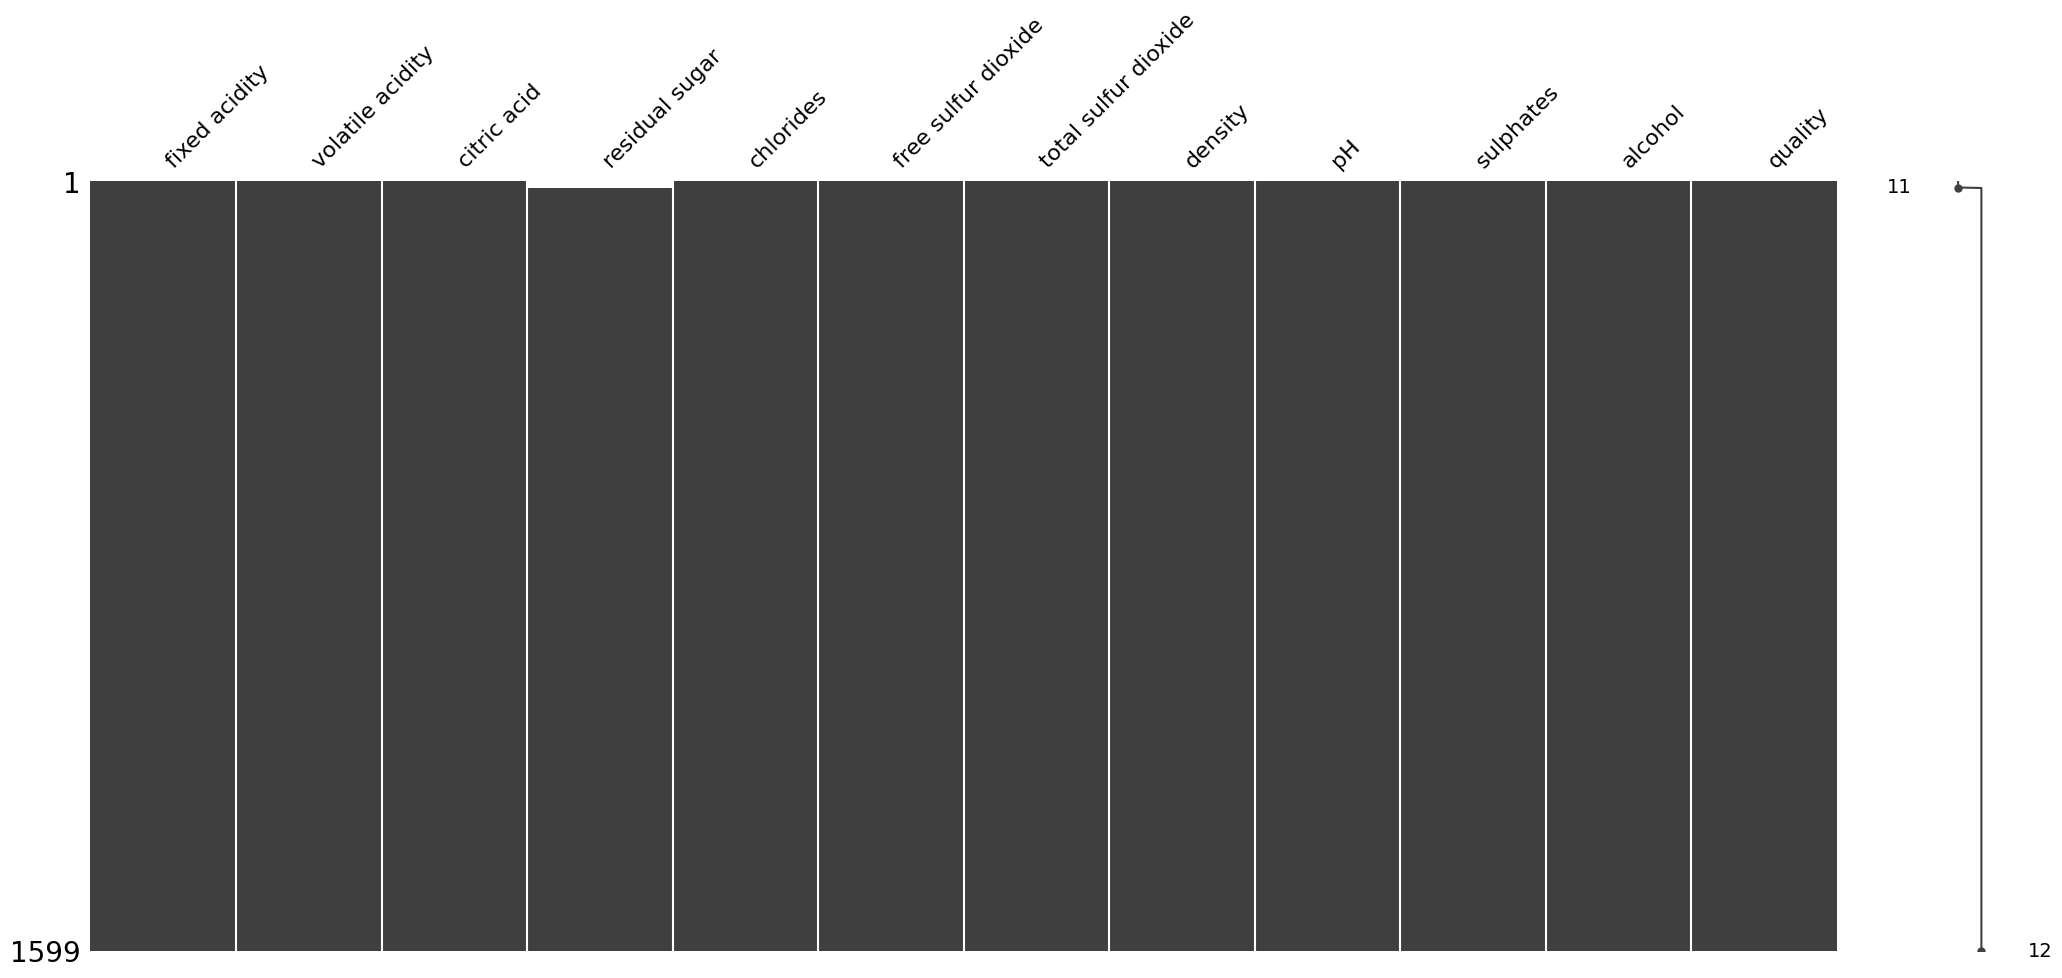

In [26]:
import missingno as msno
msno.matrix(df, sort='ascending')

In [27]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.drop(columns=['quality'])
y = df['quality']

mean_pipeline = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='mean')),
    ('model', DummyRegressor(strategy='mean'))
])

mean_scores = cross_val_score(
    mean_pipeline, X, y, cv=5, scoring='r2'
)

mean_scores.mean()


np.float64(-2.2128323421362235)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

knn_pipeline = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

knn_scores = cross_val_score(
    knn_pipeline, X, y, cv=5, scoring='r2'
)

knn_scores.mean()

np.float64(-2.3358656466935743)

# Task 2
Did the regressor perform as well as you expected? Probably not. If you didn't already, consider the scales of all variables. Are they the same? No? Copy your solution, modifying it to include a pipeline which standarizes the inputs (standard scalar). Compare and contrast the results.

**NOTE:** If you already have included a standard scalar, compare your result to one without using it.

In [29]:
from sklearn.preprocessing import StandardScaler


In [30]:
knn_scaled_pipeline = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

knn_scaled_scores = cross_val_score(
    knn_scaled_pipeline, X, y, cv=5, scoring='r2'
)

knn_scaled_scores.mean()

np.float64(-2.2169829030705075)

In [31]:
print(f"Mean learner:      {mean_scores.mean():.3f}")
print(f"kNN (no scaling):  {knn_scores.mean():.3f}")
print(f"kNN (scaled):      {knn_scaled_scores.mean():.3f}")

Mean learner:      -2.213
kNN (no scaling):  -2.336
kNN (scaled):      -2.217


## Extra task (not required): Learning Curves

Plot a learning curve for you Regressor. We have covered the theory last week. See these two links and try and work it out for yourself! Ask if you have questions.

[Short Tutorial](https://thedatascientist.com/learning-curves-scikit-learn/)

[sklearn guide](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

model = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

In [34]:
from sklearn.model_selection import learning_curve
import numpy as np

In [ ]:
train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(     #ignore fit_times and score_times for now
    estimator=model,
    X=X,
    y=y,
    cv=5,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    return_times=True
)


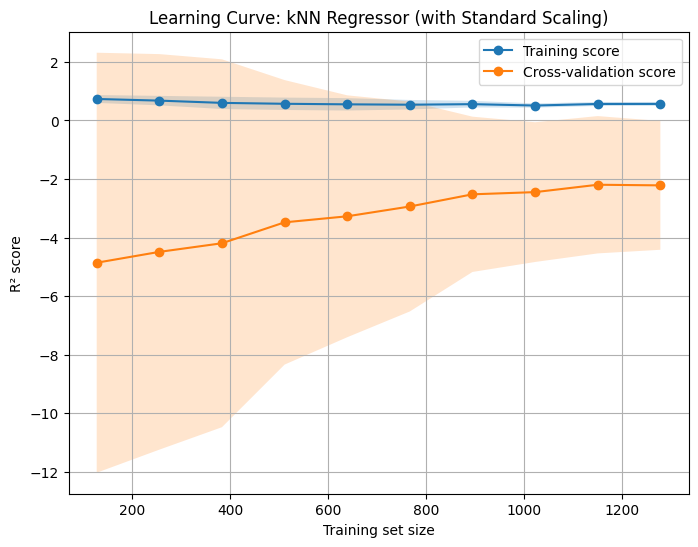

In [38]:
import matplotlib.pyplot as plt

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(8, 6))

plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', label='Cross-validation score')

plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2
)

plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.2
)

plt.xlabel('Training set size')
plt.ylabel('R² score')
plt.title('Learning Curve: kNN Regressor (with Standard Scaling)')
plt.legend()
plt.grid(True)

plt.show()
